In [2]:
from skimage.io import imread
from skimage.color import rgb2grey
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as patches
from scipy.signal import correlate2d, correlate
from numpy.linalg import norm

In [3]:
orig_img = imread('lena.png')
orig_img = rgb2grey(orig_img)

patch = orig_img.copy()
patch = patch[220:240,220:240]

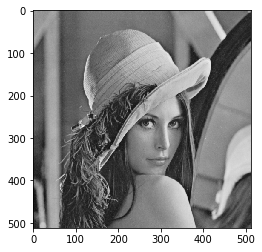

In [4]:
plt.imshow(orig_img,cmap='gray', vmin=0, vmax=1)

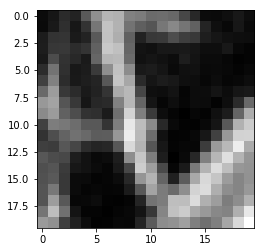

In [5]:
plt.imshow(patch,cmap='gray')

In [6]:
def euclidean_dist(mat_1, mat_2):
    dist = np.sqrt(np.sum((mat_1-mat_2)**2))
    return dist

In [7]:
def cosine_similarity(mat_1, mat_2):
    denominator = np.sqrt(np.sum(mat_1**2))*np.sqrt(np.sum(mat_2**2))
    if denominator == 0:
        return None
    phi = np.sum(mat_1*mat_2)/denominator
    phi = np.arccos(phi)
    return phi

In [8]:
def find_location_using_euclidean_dist(template, img):
    min_d = None
    best_i = None
    best_j = None
    
    for i in range(template.shape[0]-img.shape[0]):
        for j in range(template.shape[1]-img.shape[1]):
            d = euclidean_dist(template[i:i+img.shape[0],j:j+img.shape[1]], img)
            if min_d is None or d < min_d:
                min_d = d
                best_i = i
                best_j = j
                
    return best_i, best_j, min_d

In [9]:
def find_location_using_cosine_similarity(template, patch, norm=False):
    min_phi = None
    best_i = None
    best_j = None

    for i in range(template.shape[0]-patch.shape[0]):
        for j in range(template.shape[1]-patch.shape[1]):
            partial_img = template[i:i+patch.shape[0],j:j+patch.shape[1]]
            if norm:
                partial_img = partial_img - np.mean(partial_img)
                patch = patch - np.mean(patch)
            phi = cosine_similarity(partial_img, patch)
            if phi is not None and (min_phi is None or phi < min_phi):
                min_phi = phi
                best_i = i
                best_j = j

    return best_i, best_j, min_phi

In [10]:
g_noise = np.random.normal(0,0.2,orig_img.shape[0]*orig_img.shape[1])
g_noise = np.reshape(g_noise,orig_img.shape)

noise = np.full(orig_img.shape, -0.45)

nosy_orig_img = orig_img + noise + g_noise
nosy_orig_img[nosy_orig_img<0] = 0
nosy_orig_img[nosy_orig_img>1] = 1

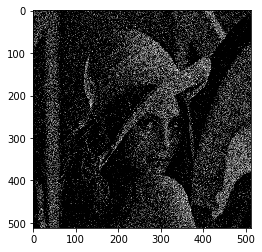

In [11]:
plt.imshow(nosy_orig_img, cmap='gray')

In [12]:
y, x, d = find_location_using_euclidean_dist(nosy_orig_img, patch)
print("Y: %f / X: %f / d: %f" % (y,x,d))

Y: 215.000000 / X: 285.000000 / d: 4.358845


In [13]:
y, x, phi = find_location_using_cosine_similarity(nosy_orig_img, patch)
print("Y: %f / X: %f / Angle: %f" % (y,x,phi))

Y: 331.000000 / X: 473.000000 / Angle: 0.629372


In [14]:
y, x, phi = find_location_using_cosine_similarity(nosy_orig_img, patch, norm=True)
print("Y: %f / X: %f / Angle: %f" % (y,x,phi))

Y: 221.000000 / X: 220.000000 / Angle: 1.065384


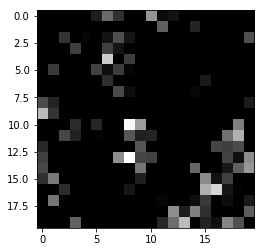

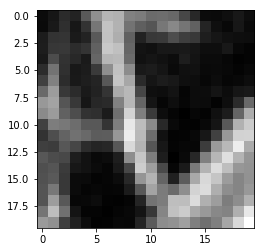

In [15]:
partial_img = nosy_orig_img[220:220+patch.shape[0],220:220+patch.shape[1]]
corr_partial_img = partial_img - np.mean(partial_img)
plt.imshow(corr_partial_img, cmap='gray')
plt.show()

corr_patch = patch - np.mean(patch)
plt.imshow(corr_patch, cmap='gray')